In [2]:
import pandas as pd

In [3]:
dz = pd.read_csv('dangerzone.csv')
dz64 = pd.read_csv('dangerzone_2564.csv')
dz65 = pd.read_csv('dangerzone_2565.csv')
df = [dz64,dz65]

In [4]:
dz.head()

,_id,n_id,year,d_zone,district,area,public_place,private,official_place,temple_area,...,traffic_officer,related_agencies,safety_equipment,d_data,punishment,pave_mainten,legal_action,other_spec2,adddate,updatedate
0,1,50,2565,กรุงธนใต้,หนองแขม,1,1,0,0,0,...,0,0,0,0,1,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
1,2,49,2565,กรุงธนใต้,ราษฎร์บูรณะ,1,1,0,0,0,...,0,0,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
2,3,48,2565,กรุงธนใต้,ภาษีเจริญ,6,6,0,0,0,...,0,0,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
3,4,47,2565,กรุงธนใต้,บางบอน,4,3,0,1,0,...,0,1,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00
4,5,46,2565,กรุงธนใต้,บางแค,9,9,0,0,0,...,0,0,0,0,0,0,0,0,2023-07-17T00:00:00,2023-07-17T00:00:00


In [4]:
dz.dtypes

_id              int64
n_id             int64
year             int64
d_zone          object
district        object
                 ...  
pave_mainten     int64
legal_action     int64
other_spec2      int64
adddate         object
updatedate      object
Length: 88, dtype: object

In [7]:
unique_d_zone_names = dz['d_zone'].unique()
print(unique_d_zone_names)


['กรุงธนใต้' 'กรุงธนเหนือ' 'กรุงเทพตะวันออก' 'กรุงเทพกลาง' 'กรุงเทพใต้'
 'กรุงเทพเหนือ']


In [5]:
# Define a mapping of names to assigned values
name_to_value = {
    'กรุงธนใต้': 1,
    'กรุงธนเหนือ': 2,
    'กรุงเทพตะวันออก': 3,
    'กรุงเทพกลาง': 4,
    'กรุงเทพใต้': 5,
    'กรุงเทพเหนือ': 6
}

# Use the map function to create a new column with the assigned values
dz['d_zone_value'] = dz['d_zone'].map(name_to_value)


In [6]:
grouped_data = dz.groupby('d_zone_value')['district'].apply(list).reset_index()

# Add a column with the names of the d_zone values
grouped_data['d_zone_name'] = grouped_data['d_zone_value'].map({1: 'กรุงธนใต้', 2: 'กรุงธนเหนือ', 3: 'กรุงเทพตะวันออก', 4: 'กรุงเทพกลาง', 5: 'กรุงเทพใต้', 6: 'กรุงเทพเหนือ'})
grouped_data

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
dz = pd.read_csv('dangerzone.csv')

# Separate columns by data type
int64_columns = dz.select_dtypes(include=['int64']).columns
float_columns = dz.select_dtypes(include=['float']).columns
object_columns = dz.select_dtypes(include=['object']).columns

# Count the number of columns in each category
num_int64_columns = len(int64_columns)
num_float_columns = len(float_columns)
num_object_columns = len(object_columns)

# Print the results
print(f"Number of int64 columns: {num_int64_columns}")
print(f"Number of float columns: {num_float_columns}")
print(f"Number of object columns: {num_object_columns}")

# List the column names in each category
print("\nInt64 columns:")
print(int64_columns)

print("\nFloat columns:")
print(float_columns)

print("\nObject columns:")
print(object_columns)


Number of int64 columns: 84
Number of float columns: 0
Number of object columns: 4

Int64 columns:
Index(['_id', 'n_id', 'year', 'area', 'public_place', 'private',
       'official_place', 'temple_area', 'state_enterprise', 'elsewhere',
       'overpass', 'bus_stop', 'park', 'shelter', 'vacant_land',
       'commerce_building', 'entertainment_place', 'bridge', 'street',
       'bridgesandroads', 'footpath', 'alley', 'village', 'market',
       'tourist_attraction', 'academy', 'government', 'intersection', 'other',
       'pier', 'promenade', 'footpathandalley', 'gardens_bridges',
       'skytrain_station', 'tunnelundertheroad', 'sports_center',
       'transport_station', 'religious_place', 'under_bridges', 'lonely_night',
       'lone_day', 'blind_spot', 'desolate', 'dirty', 'old_building',
       'damaged_light', 'obstructing_traffic', 'homeless', 'mingling_source',
       'mayhem', 'extortion', 'accident_r', 'accident_f', 'accident_e',
       'accident_s', 'accident_t', 'accident_o'

In [72]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

top_districts_dzones_largest = dz.nlargest(10, 'alley')[['district', 'd_zone','alley']]
top_districts_dzones_largest


,district,d_zone,alley
40,บางนา,กรุงเทพใต้,6
67,ลาดกระบัง,กรุงเทพตะวันออก,6
90,บางนา,กรุงเทพใต้,6
7,บางพลัด,กรุงธนเหนือ,5
14,คลองสาน,กรุงธนเหนือ,5
64,คลองสาน,กรุงธนเหนือ,4
69,ประเวศ,กรุงเทพตะวันออก,4
93,หลักสี่,กรุงเทพเหนือ,4
16,สะพานสูง,กรุงเทพตะวันออก,3
34,สวนหลวง,กรุงเทพใต้,3


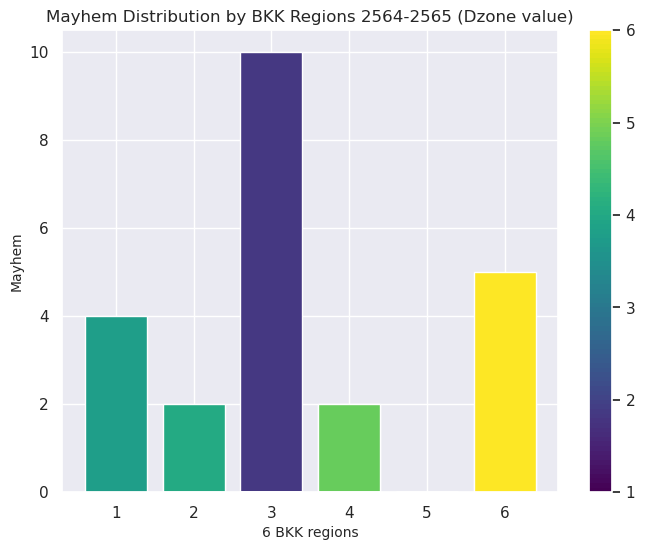

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the values for the X-axis and Y-axis
d_zone_values = dz['d_zone_value']
mayhem_values = dz['mayhem']

# Define a colormap with a unique color for each 'd_zone_value'
colormap = plt.cm.get_cmap('viridis', len(d_zone_values))

# Create the bar graph using Matplotlib with different colors for each bar
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")   # Set the style for the plot

bars = plt.bar(d_zone_values, mayhem_values, color=[colormap(i) for i in np.arange(len(d_zone_values))])

# Set plot labels and title
plt.xlabel('6 BKK regions', fontsize=10)
plt.ylabel('Mayhem', fontsize=10)
plt.title('Mayhem Distribution by BKK Regions 2564-2565 (Dzone value)', fontsize=12)

# Create a color bar for reference
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(d_zone_values), vmax=max(d_zone_values)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')

plt.grid(True)

plt.show()

grouped_data

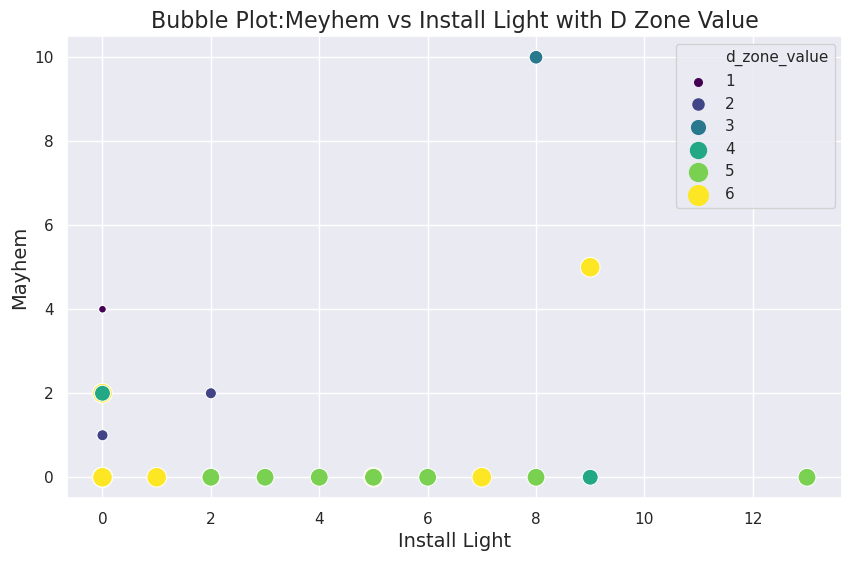

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the values for the X-axis and Y-axes
mayhem_values = dz['mayhem']
install_light_values = dz['install_light']
d_zone_values = dz['d_zone_value']

# Create a bubble plot using Seaborn with color and size mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=install_light_values,
    y=mayhem_values,
    hue=d_zone_values,
    size=d_zone_values,  # Bubble size based on 'D Zone Value'
    palette='viridis',
    sizes=(30, 200),
    legend='full'  # Show all values in the legend
)

# Set plot labels and title
plt.xlabel('Install Light', fontsize=14)
plt.ylabel('Mayhem', fontsize=14)
plt.title('Bubble Plot:Meyhem vs Install Light with D Zone Value', fontsize=16)

plt.grid(True)
plt.show()

#Install light เยอะแทบไม่มี Meyhem

In [17]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

top_districts_dzones_mayhem = filtered_dz.nlargest(10, 'mayhem')[['district', 'd_zone','mayhem']]
top_districts_dzones_mayhem
#ทำร้ายร่างกาย

,district,d_zone,mayhem
16,สะพานสูง,กรุงเทพตะวันออก,10
99,จตุจักร,กรุงเทพเหนือ,5
55,บางขุนเทียน,กรุงธนใต้,4
26,วังทองหลาง,กรุงเทพกลาง,2
43,หลักสี่,กรุงเทพเหนือ,2
60,ธนบุรี,กรุงธนเหนือ,2
76,วังทองหลาง,กรุงเทพกลาง,2
58,บางกอกใหญ่,กรุงธนเหนือ,1
0,หนองแขม,กรุงธนใต้,0
1,ราษฎร์บูรณะ,กรุงธนใต้,0


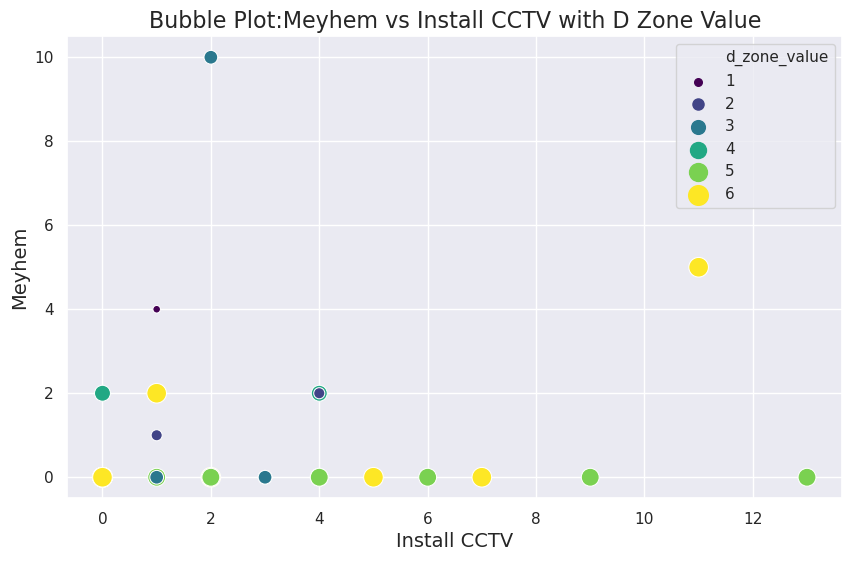

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

# Get the values for the X-axis and Y-axes
mayhem_values = dz['mayhem']
install_cctv_values = dz['install_cctv']
d_zone_values = dz['d_zone_value']

# Create a bubble plot using Seaborn with color and size mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=install_cctv_values,
    y=mayhem_values,
    hue=d_zone_values,
    size=d_zone_values,  # Bubble size based on 'D Zone Value'
    palette='viridis',
    sizes=(30, 200),
    legend='full'  # Show all values in the legend
)

# Set plot labels and title
plt.xlabel('Install CCTV', fontsize=14)
plt.ylabel('Meyhem', fontsize=14)
plt.title('Bubble Plot:Meyhem vs Install CCTV with D Zone Value', fontsize=16)

plt.grid(True)
plt.show()

#กล้อง CCTV น้อย ทำร้ายร่างกาย meyhem เยอะ

In [22]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

top_districts_dzones_lonely_night = dz.nlargest(10, 'lonely_night')[['n_id','district','d_zone','lonely_night']]
top_districts_dzones_lonely_night
#เปลี่ยวช่วงกลางคืน

,n_id,district,d_zone,lonely_night
64,36,คลองสาน,กรุงธนเหนือ,22
65,35,หนองจอก,กรุงเทพตะวันออก,20
98,2,ดอนเมือง,กรุงเทพเหนือ,18
78,22,พระนคร,กรุงเทพกลาง,16
55,45,บางขุนเทียน,กรุงธนใต้,15
67,33,ลาดกระบัง,กรุงเทพตะวันออก,14
88,12,ปทุมวัน,กรุงเทพใต้,13
89,11,บางรัก,กรุงเทพใต้,13
50,50,หนองแขม,กรุงธนใต้,12
16,34,สะพานสูง,กรุงเทพตะวันออก,11


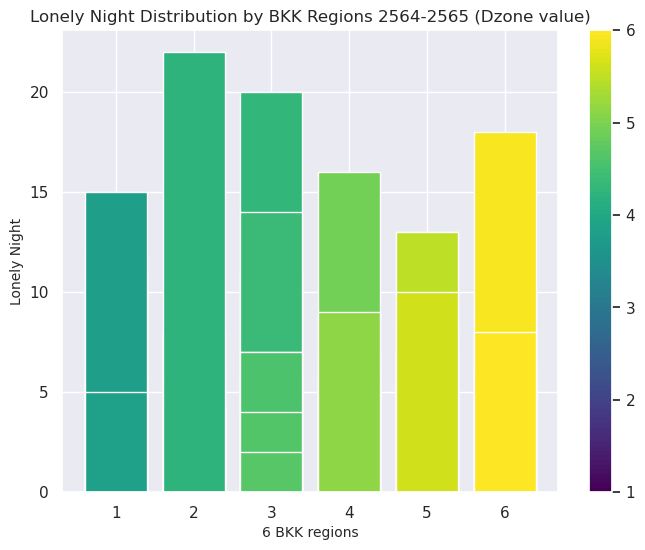

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values for the X-axis and Y-axis
d_zone_values = dz['d_zone_value']
lonely_night_values = dz['lonely_night']

# Define a colormap with a unique color for each 'd_zone_value'
colormap = plt.cm.get_cmap('viridis', len(d_zone_values))

# Create the bar graph using Matplotlib with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(d_zone_values, lonely_night_values, color=[colormap(i) for i in np.arange(len(d_zone_values))])

# Set plot labels and title
plt.xlabel('6 BKK regions', fontsize=10)
plt.ylabel('Lonely Night', fontsize=10)
plt.title('Lonely Night Distribution by BKK Regions 2564-2565 (Dzone value)', fontsize=12)

# Create a color bar for reference
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(d_zone_values), vmax=max(d_zone_values)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')

plt.grid(True)

plt.show()

grouped_data

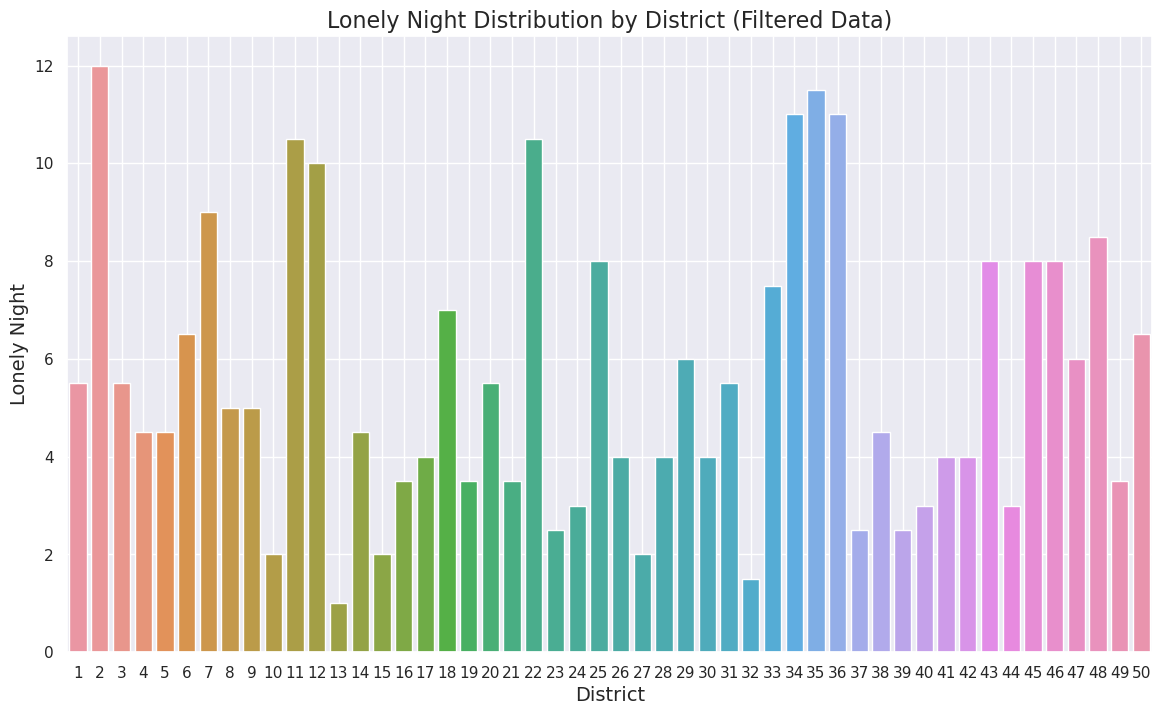

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df = [dz64, dz65]

# Combine the DataFrames in the list
combined_df = pd.concat(df, ignore_index=True)

# Create the bar graph
plt.figure(figsize=(14, 8))  # Set the figure size
sns.set(style="darkgrid")   # Set the style for the plot

# Create the bar graph using Seaborn with the combined data
sns.barplot(x='n_id', y='lonely_night', data=combined_df, ci=None)
plt.xticks(rotation=0)  # Rotate the X-axis labels by 0 degrees for better readability

# Set plot labels and title
plt.xlabel('District', fontsize=14)
plt.ylabel('Lonely Night', fontsize=14)
plt.title('Lonely Night Distribution by District (Filtered Data)', fontsize=16)
plt.grid(True)

plt.show()  # Display the plot

#the mean (average) of the 'lonely_night' values for each 'n_id' (district)

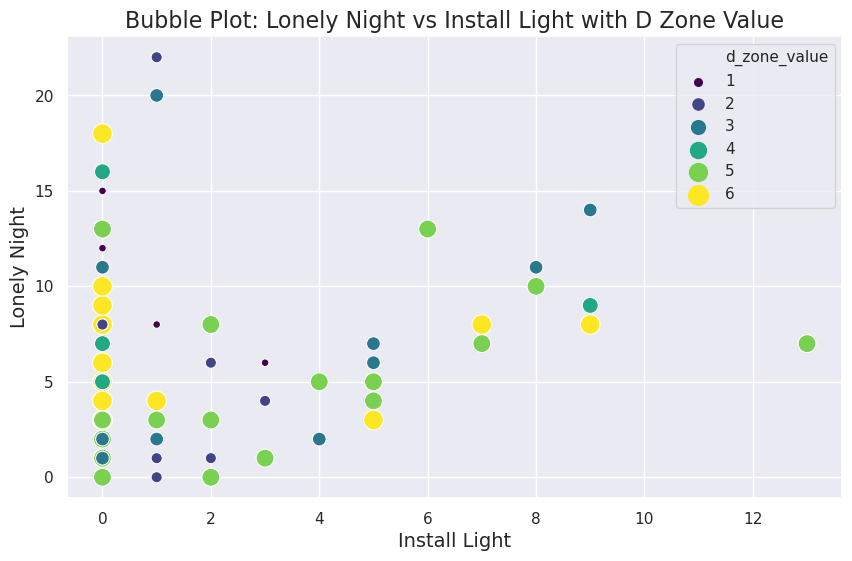

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the values for the X-axis and Y-axes
lonely_night_values = dz['lonely_night']
install_light_values = dz['install_light']
d_zone_values = dz['d_zone_value']

# Create a bubble plot using Seaborn with color and size mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=install_light_values,
    y=lonely_night_values,
    hue=d_zone_values,
    size=d_zone_values,  # Bubble size based on 'D Zone Value'
    palette='viridis',
    sizes=(30, 200),
    legend='full'  # Show all values in the legend
)

# Set plot labels and title
plt.xlabel('Install Light', fontsize=14)
plt.ylabel('Lonely Night', fontsize=14)
plt.title('Bubble Plot: Lonely Night vs Install Light with D Zone Value', fontsize=16)

plt.grid(True)
plt.show()

#install light น้อยเสี่ยง lonelynightเยอะขึ้น

In [83]:
grouped_data

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


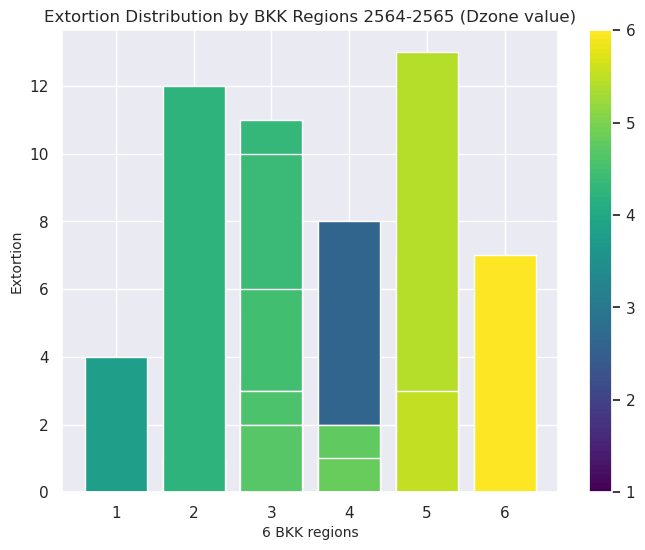

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values for the X-axis and Y-axis
d_zone_values = dz['d_zone_value']
extortion_values = dz['extortion']

# Define a colormap with a unique color for each 'd_zone_value'
colormap = plt.cm.get_cmap('viridis', len(d_zone_values))

# Create the bar graph using Matplotlib with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(d_zone_values, extortion_values, color=[colormap(i) for i in np.arange(len(d_zone_values))])

# Set plot labels and title
plt.xlabel('6 BKK regions', fontsize=10)
plt.ylabel('Extortion', fontsize=10)
plt.title('Extortion Distribution by BKK Regions 2564-2565 (Dzone value)', fontsize=12)

# Create a color bar for reference
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(d_zone_values), vmax=max(d_zone_values)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')

plt.grid(True)

plt.show()

grouped_data

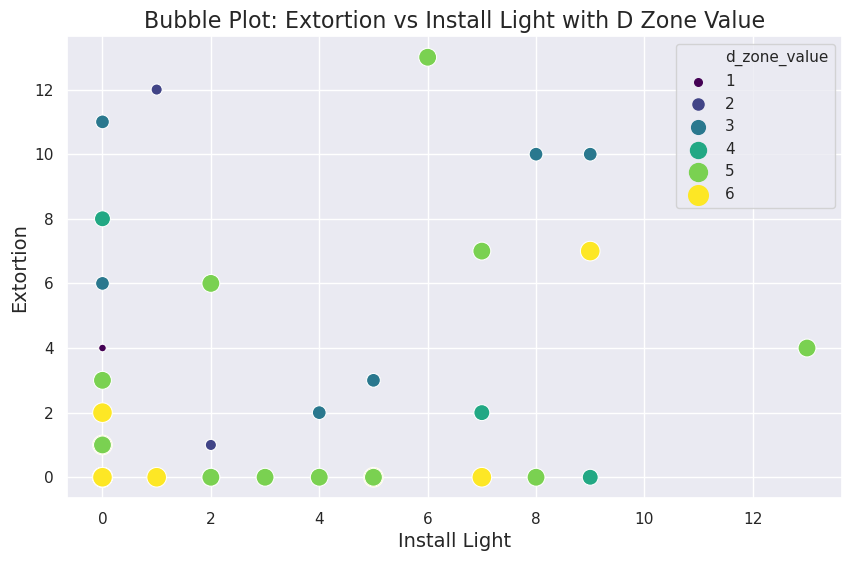

In [84]:
# Get the values for the X-axis and Y-axes
extortion_values = dz['extortion']
install_light_values = dz['install_light']
d_zone_values = dz['d_zone_value']

# Create a bubble plot using Seaborn with color and size mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=install_light_values,
    y=extortion_values,
    hue=d_zone_values,
    size=d_zone_values,  # Bubble size based on 'D Zone Value'
    palette='viridis',
    sizes=(30, 200),
    legend='full'  # Show all values in the legend
)

# Set plot labels and title
plt.xlabel('Install Light', fontsize=14)
plt.ylabel('Extortion', fontsize=14)
plt.title('Bubble Plot: Extortion vs Install Light with D Zone Value', fontsize=16)

plt.grid(True)
plt.show()


In [75]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

top_districts_dzones_extortion = dz.nlargest(10, 'extortion')[['district', 'd_zone','extortion']]
top_districts_dzones_extortion
#ปล้น ชิง วิ่งราว กรรโชก ลักทรัพย์

,district,d_zone,extortion
88,ปทุมวัน,กรุงเทพใต้,13
64,คลองสาน,กรุงธนเหนือ,12
66,สะพานสูง,กรุงเทพตะวันออก,11
16,สะพานสูง,กรุงเทพตะวันออก,10
67,ลาดกระบัง,กรุงเทพตะวันออก,10
32,ดินแดง,กรุงเทพกลาง,8
83,สาทร,กรุงเทพใต้,7
99,จตุจักร,กรุงเทพเหนือ,7
69,ประเวศ,กรุงเทพตะวันออก,6
86,ยานนาวา,กรุงเทพใต้,6


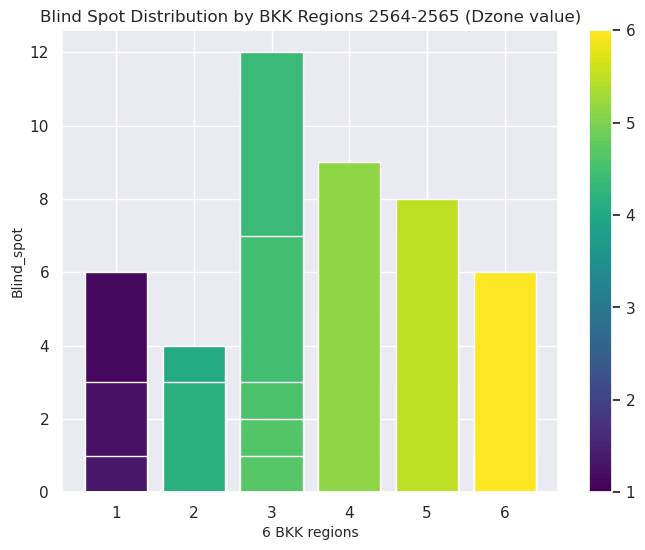

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values for the X-axis and Y-axis
d_zone_values = dz['d_zone_value']
blind_spot_values = dz['blind_spot']

# Define a colormap with a unique color for each 'd_zone_value'
colormap = plt.cm.get_cmap('viridis', len(d_zone_values))

# Create the bar graph using Matplotlib with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(d_zone_values, blind_spot_values, color=[colormap(i) for i in np.arange(len(d_zone_values))])

# Set plot labels and title
plt.xlabel('6 BKK regions', fontsize=10)
plt.ylabel('Blind_spot', fontsize=10)
plt.title('Blind Spot Distribution by BKK Regions 2564-2565 (Dzone value)', fontsize=12)

# Create a color bar for reference
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(d_zone_values), vmax=max(d_zone_values)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')

plt.grid(True)

plt.show()

grouped_data

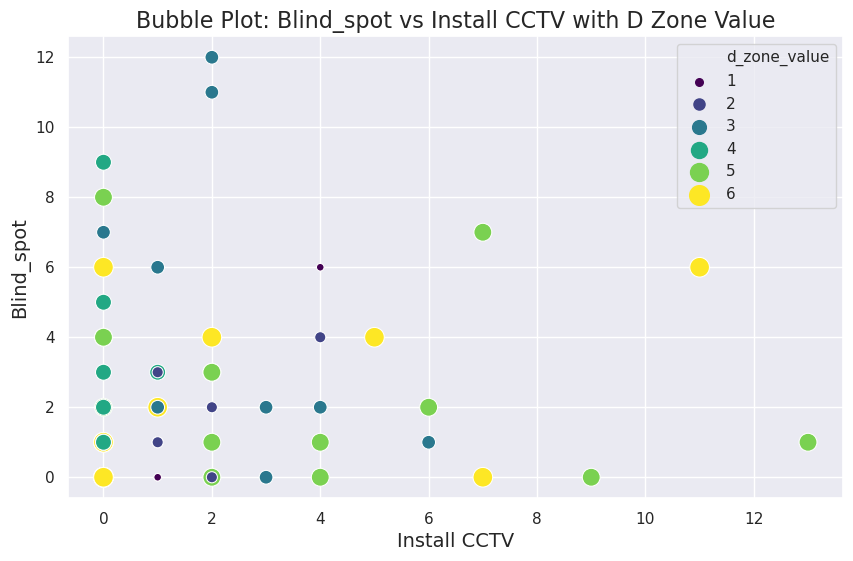

In [22]:
blind_spot_values = dz['blind_spot']
install_cctv_values = dz['install_cctv']
d_zone_values = dz['d_zone_value']

# Create a bubble plot using Seaborn with color and size mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=install_cctv_values,
    y=blind_spot_values,
    hue=d_zone_values,
    size=d_zone_values,  # Bubble size based on 'D Zone Value'
    palette='viridis',
    sizes=(30, 200),
    legend='full'  # Show all values in the legend
)

# Set plot labels and title
plt.xlabel('Install CCTV', fontsize=14)
plt.ylabel('Blind_spot', fontsize=14)
plt.title('Bubble Plot: Blind_spot vs Install CCTV with D Zone Value', fontsize=16)

plt.grid(True)
plt.show()

#จุดที่ติดไฟควรติดCCTV ด้วย

In [12]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

top_districts_dzones_blind_spot = dz.nlargest(10, 'blind_spot')[['district', 'd_zone','blind_spot']]
top_districts_dzones_blind_spot
#blind_spot

,district,d_zone,blind_spot
67,ลาดกระบัง,กรุงเทพตะวันออก,12
16,สะพานสูง,กรุงเทพตะวันออก,11
82,ดินแดง,กรุงเทพกลาง,9
89,บางรัก,กรุงเทพใต้,8
69,ประเวศ,กรุงเทพตะวันออก,7
83,สาทร,กรุงเทพใต้,7
2,ภาษีเจริญ,กรุงธนใต้,6
20,บึงกุ่ม,กรุงเทพตะวันออก,6
21,บางกะปิ,กรุงเทพตะวันออก,6
95,ลาดพร้าว,กรุงเทพเหนือ,6


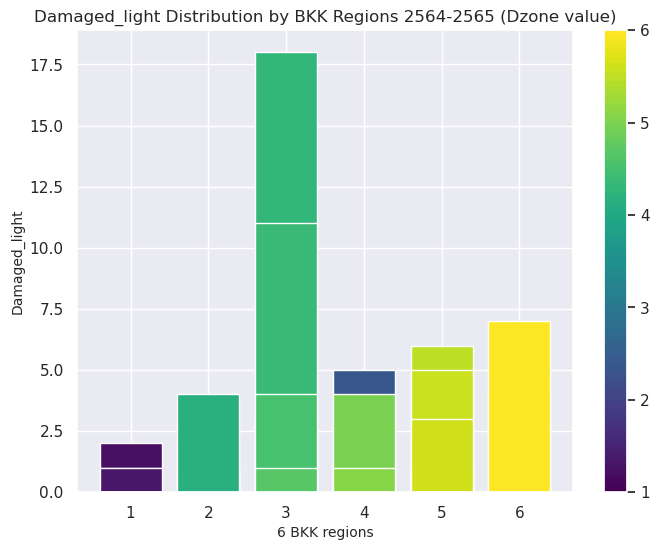

,d_zone_value,district,d_zone_name
0,1,"[หนองแขม, ราษฎร์บูรณะ, ภาษีเจริญ, บางบอน, บางแ...",กรุงธนใต้
1,2,"[บางพลัด, บางกอกใหญ่, บางกอกน้อย, ธนบุรี, ทวีว...",กรุงธนเหนือ
2,3,"[หนองจอก, สะพานสูง, ลาดกระบัง, มีนบุรี, ประเวศ...",กรุงเทพตะวันออก
3,4,"[ห้วยขวาง, สัมพันธวงศ์, วังทองหลาง, ราชเทวี, พ...",กรุงเทพกลาง
4,5,"[สาทร, สวนหลวง, วัฒนา, ยานนาวา, พระโขนง, ปทุมว...",กรุงเทพใต้
5,6,"[หลักสี่, สายไหม, ลาดพร้าว, บางซื่อ, บางเขน, ด...",กรุงเทพเหนือ


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get the values for the X-axis and Y-axis
d_zone_values = dz['d_zone_value']
damaged_light_values = dz['damaged_light']

# Define a colormap with a unique color for each 'd_zone_value'
colormap = plt.cm.get_cmap('viridis', len(d_zone_values))

# Create the bar graph using Matplotlib with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(d_zone_values, damaged_light_values, color=[colormap(i) for i in np.arange(len(d_zone_values))])

# Set plot labels and title
plt.xlabel('6 BKK regions', fontsize=10)
plt.ylabel('Damaged_light', fontsize=10)
plt.title('Damaged_light Distribution by BKK Regions 2564-2565 (Dzone value)', fontsize=12)

# Create a color bar for reference
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=min(d_zone_values), vmax=max(d_zone_values)))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')

plt.grid(True)

plt.show()

grouped_data

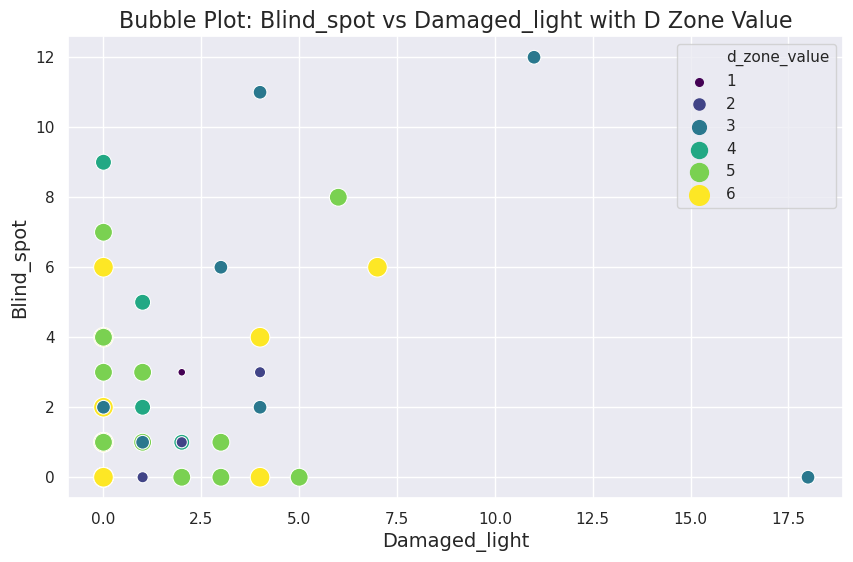

In [16]:
blind_spot_values = dz['blind_spot']
damaged_light_values = dz['damaged_light']
d_zone_values = dz['d_zone_value']

# Create a bubble plot using Seaborn with color and size mapping
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=damaged_light_values,
    y=blind_spot_values,
    hue=d_zone_values,
    size=d_zone_values,  # Bubble size based on 'D Zone Value'
    palette='viridis',
    sizes=(30, 200),
    legend='full'  # Show all values in the legend
)

# Set plot labels and title
plt.xlabel('Damaged_light', fontsize=14)
plt.ylabel('Blind_spot', fontsize=14)
plt.title('Bubble Plot: Blind_spot vs Damaged_light with D Zone Value', fontsize=16)

plt.grid(True)
plt.show()


In [13]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]
top_districts_dzones_damaged_light = dz.nlargest(10, 'damaged_light')[['district', 'd_zone','damaged_light']]
top_districts_dzones_damaged_light
#damaged_light
#หนองจอกไฟเสียเยอะแต่ไม่มีblindspot,ลาดกระบังไฟเสียเยอะblindspotเยอะ

,district,d_zone,damaged_light
65,หนองจอก,กรุงเทพตะวันออก,18
67,ลาดกระบัง,กรุงเทพตะวันออก,11
99,จตุจักร,กรุงเทพเหนือ,7
89,บางรัก,กรุงเทพใต้,6
27,ราชเทวี,กรุงเทพกลาง,5
91,บางคอแหลม,กรุงเทพใต้,5
16,สะพานสูง,กรุงเทพตะวันออก,4
34,สวนหลวง,กรุงเทพใต้,4
49,จตุจักร,กรุงเทพเหนือ,4
63,จอมทอง,กรุงธนเหนือ,4


In [56]:
#5 highest dangerzone districts
# Columns to consider for counting
columns_to_count = [
    'area', 'public_place', 'private', 'official_place', 'temple_area',
    'state_enterprise', 'elsewhere', 'overpass', 'bus_stop', 'park',
    'shelter', 'vacant_land', 'commerce_building', 'entertainment_place',
    'bridge', 'street', 'bridgesandroads', 'footpath', 'alley', 'village',
    'market', 'tourist_attraction', 'academy', 'government', 'intersection',
    'other', 'pier', 'promenade', 'footpathandalley', 'gardens_bridges',
    'skytrain_station', 'tunnelundertheroad', 'sports_center', 'transport_station',
    'religious_place', 'under_bridges', 'lonely_night', 'lone_day', 'blind_spot',
    'desolate', 'dirty', 'old_building', 'damaged_light', 'obstructing_traffic',
    'homeless', 'mingling_source', 'mayhem', 'extortion', 'accident_r', 'accident_f',
    'accident_e', 'accident_s', 'accident_t', 'accident_o', 'harass', 'chaotically',
    'danger_animals', 'landmark', 'crime_sexual', 'breeding_patho', 'other_risk',
    'surveillance', 'clean', 'tree_pruning', 'adjust_landscape', 'demolish', 'check_cctv',
    'install_cctv', 'repair_cctv', 'install_light', 'repair_light', 'warning_label',
    'coordinate_police', 'traffic_officer', 'related_agencies', 'safety_equipment',
    'd_data', 'punishment', 'pave_mainten', 'legal_action', 'other_spec2'
]

In [57]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

# Group and count by 'd_zone' and 'district'
grouped = dz.groupby(['d_zone', 'district'])[columns_to_count].sum()

# Create a new column 'total' to represent the total count
grouped['total'] = grouped.sum(axis=1)

# Sort the DataFrame by 'total' in descending order
sorted_grouped = grouped.sort_values(by='total', ascending=False)

# Select the top 5 'd_zone' and 'district' combinations
top_5_combinations = sorted_grouped[['total']].head(5)
top_5_combinations

,,total
d_zone,district,
กรุงเทพตะวันออก,สะพานสูง,251
กรุงเทพใต้,ปทุมวัน,247
กรุงธนใต้,บางขุนเทียน,245
กรุงธนเหนือ,คลองสาน,233
กรุงเทพเหนือ,จตุจักร,231


In [59]:
filtered_dz = dz[(dz['year'] >= 2564) & (dz['year'] <= 2565)]

grouped = dz.groupby(['d_zone', 'district'])[columns_to_count].sum()

# Create a new column 'total' to represent the total count
grouped['total'] = grouped.sum(axis=1)

# Sort the DataFrame by 'total' in ascending order
sorted_grouped = grouped.sort_values(by='total', ascending=True)

# Select the top 5 'd_zone' and 'district' combinations with the lowest counts
top_5_combinations_lowest = sorted_grouped[['total']].head(5)
top_5_combinations_lowest

total
d_zone          district          
กรุงธนใต้       ราษฎร์บูรณะ     42
                ทุ่งครุ         43
กรุงเทพตะวันออก มีนบุรี         52
กรุงเทพใต้      วัฒนา           56
กรุงเทพกลาง     ห้วยขวาง        62